In [1]:
import glob

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *

import numpy as np
from sklearn.model_selection import train_test_split
from skimage import filters, transform
import skimage.io as io
import matplotlib.pyplot as plt

from nii_preprocess import niftiToFlowArray
from train_unet import *
from notebook_utils import *

In [ ]:
model_path = '../unet.h5'
image_path = '/home/moopers/Desktop/small_image_set'

image_list = glob.glob(image_path +'*.nii')

In [4]:
# Convert Nii stacks to rank 4 numpy array (batch size, height, width, channels) to use
# Keras ImageDataGenerator.flow() method
image_data_array, mask_data_array = niftiToFlowArray(file_list, image_height=630, image_width=630)

In [5]:
x_predict, y_predict = resizeDataArrays(image_data_array, mask_data_array)

In [2]:
model = load_model(model_path)

In [9]:
# Evaluate the model
# TODO: replace x_test (Covid images) with COPDGene images, move to separate script
predict_results = model.predict(x_predict, batch_size=10, verbose=1)

13/13 [==============================] - 3s 238ms/step


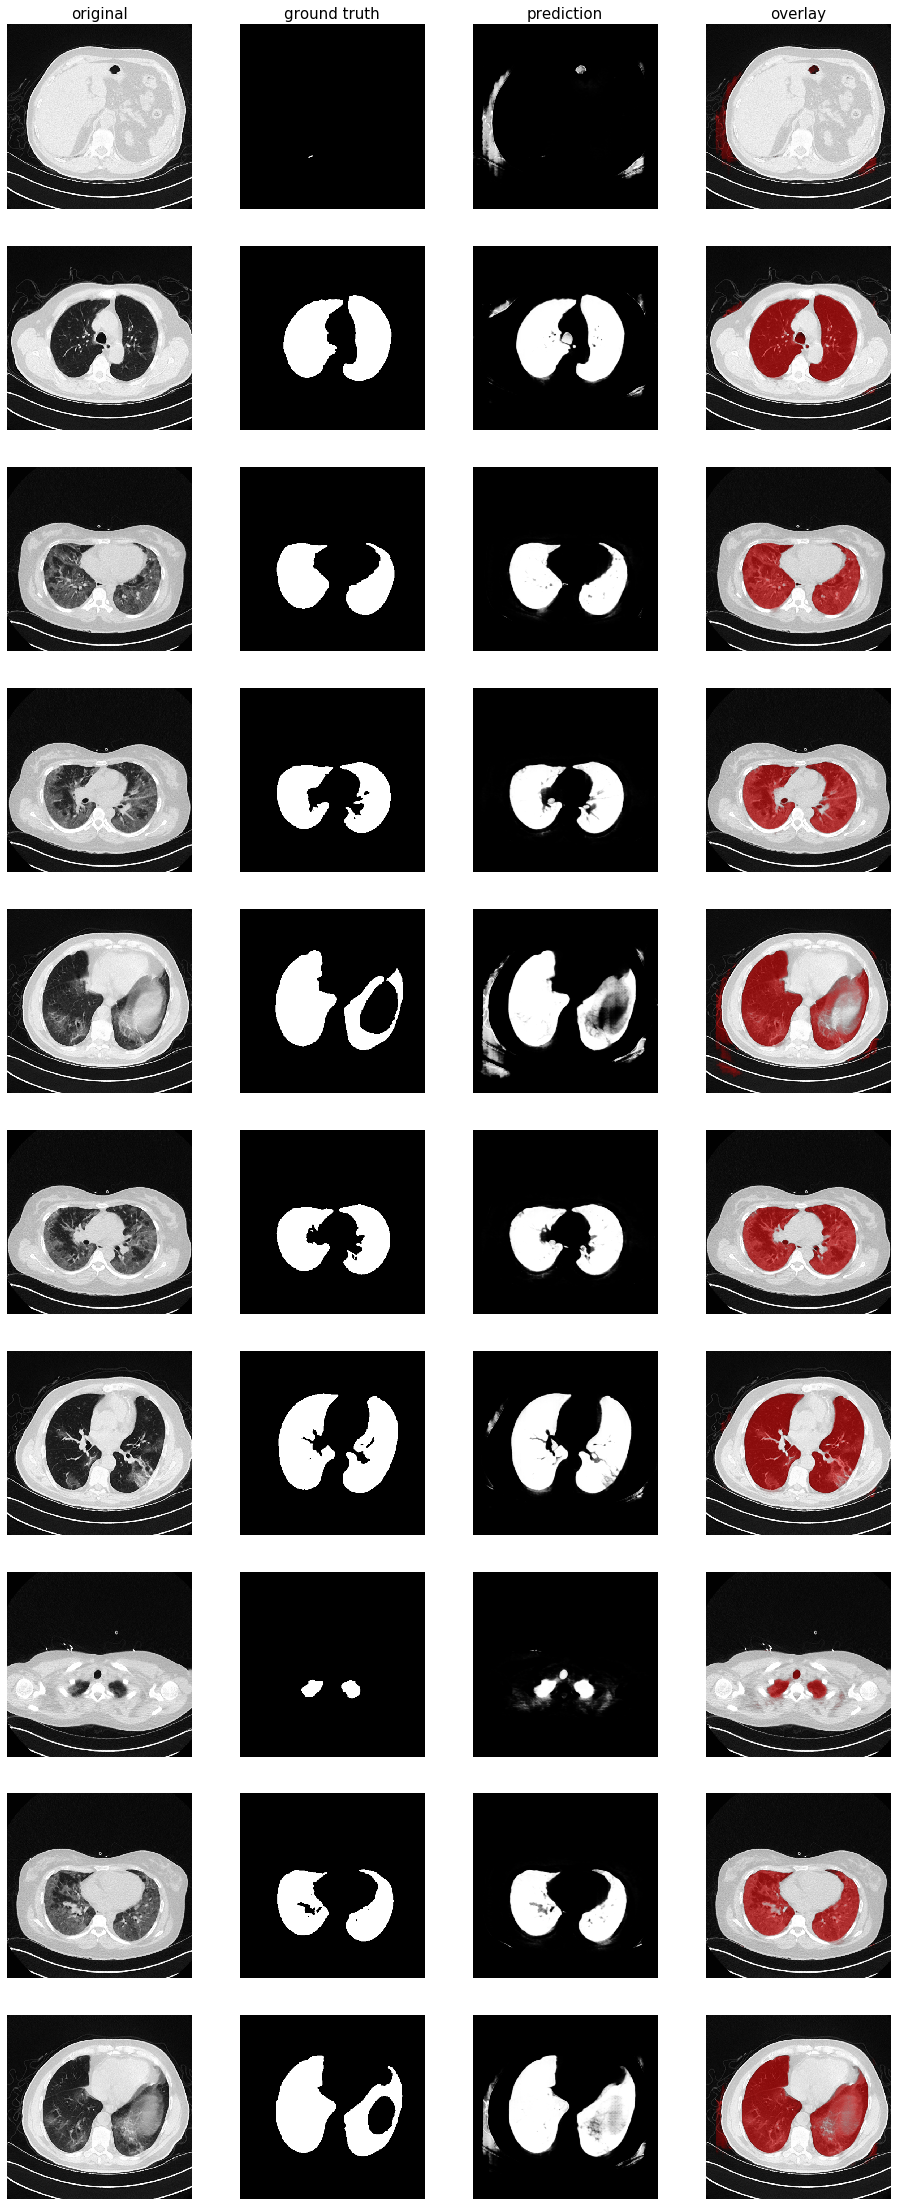

In [10]:
plot_imgs(org_imgs=x_predict, mask_imgs=y_predict, pred_imgs=predict_results, nm_img_to_plot=10)

In [11]:
from numba import cuda
cuda.select_device(0)
cuda.close()